In [ ]:
'''Assignment 1: Data Visualization
Tasks:
Plot the total sum of Transaction_Amount per Account_Type using a bar plot.
Create a pie chart to show the percentage of transactions per Branch.
Objective:
Understand how to visualize data using Pandas' built-in plotting capabilities (Matplotlib integration).
'''

   Product_ID Product_Name         Region  Marketing_Spend   Sales  \
0         101   PainRelief  North America            50000  100000   
1         102     ColdCure         Europe            30000   60000   
2         103  HeadacheFix           Asia            45000   80000   
3         104   PainRelief  North America            52000  110000   
4         105     ColdCure         Europe            28000   55000   

   Effectiveness  Side_Effects Age_Group Trial_Period  
0             85             5     20-30     6 months  
1             75             2     30-40     3 months  
2             80             3     40-50     6 months  
3             88             4     50-60    12 months  
4             70             1     30-40     3 months  
Product_ID         0
Product_Name       0
Region             0
Marketing_Spend    0
Sales              0
Effectiveness      0
Side_Effects       0
Age_Group          0
Trial_Period       0
dtype: int64
0
Product_ID         0
Product_Name      

<ipython-input-33-a08b42ee1b10>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Sales', estimator=sum, ci=None)


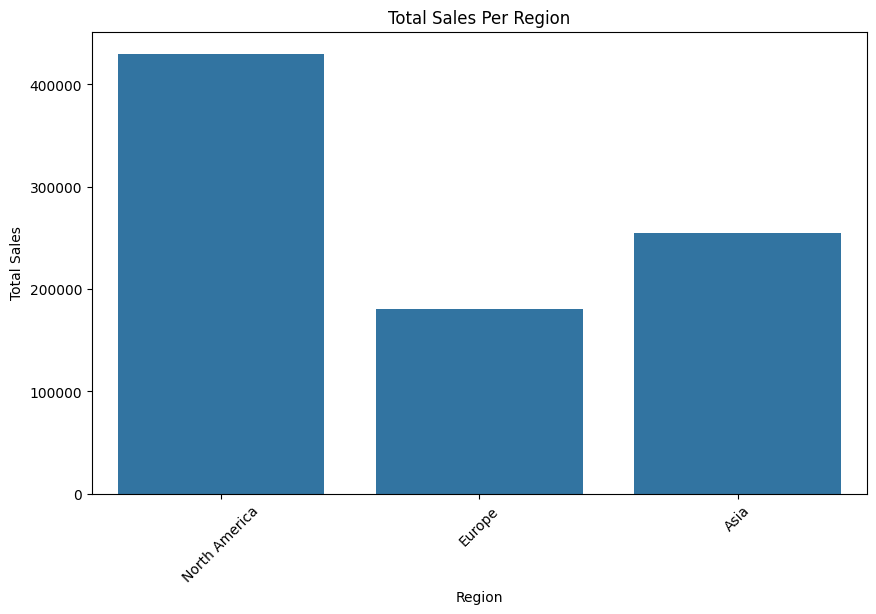

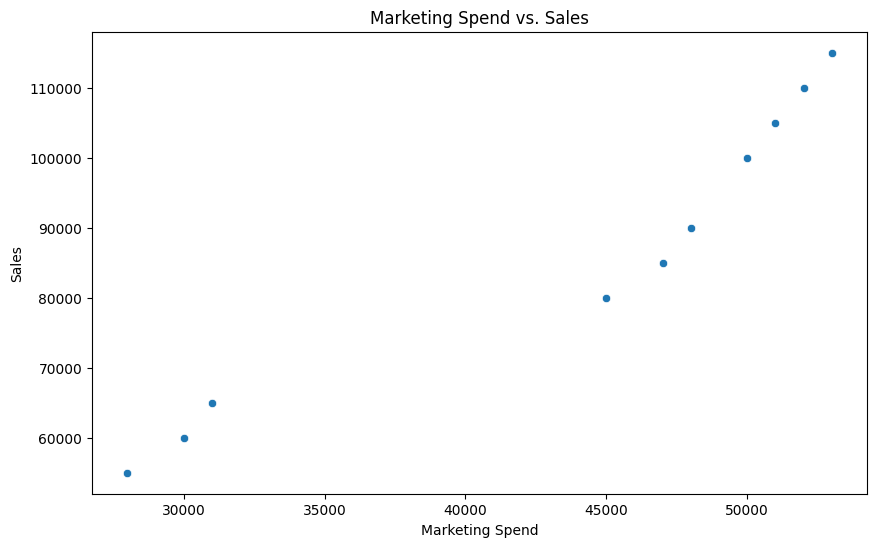

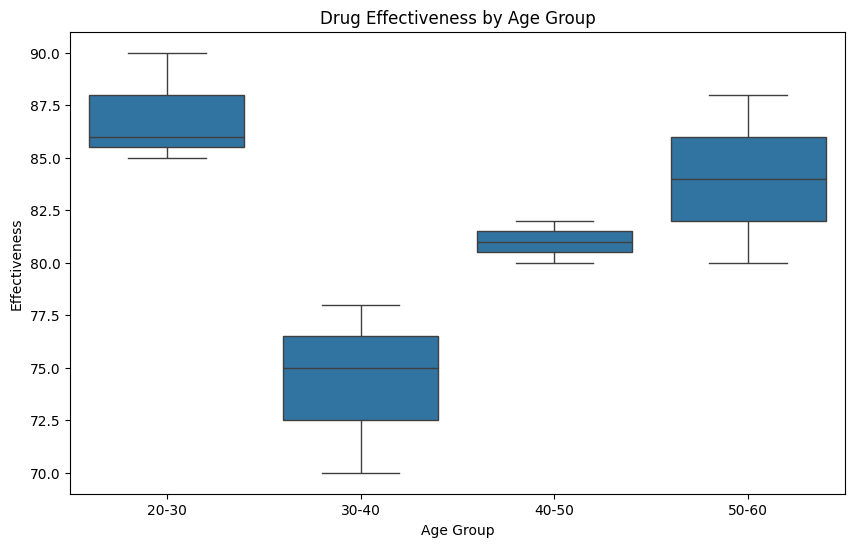

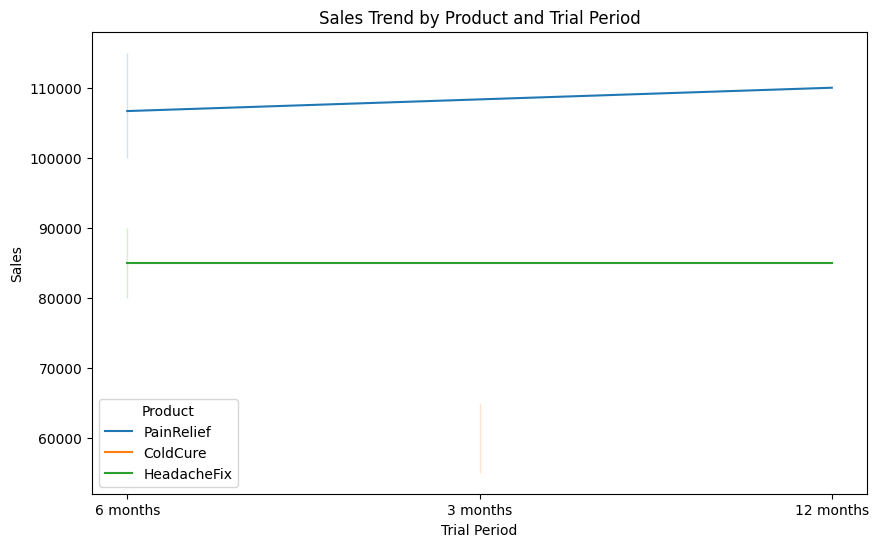

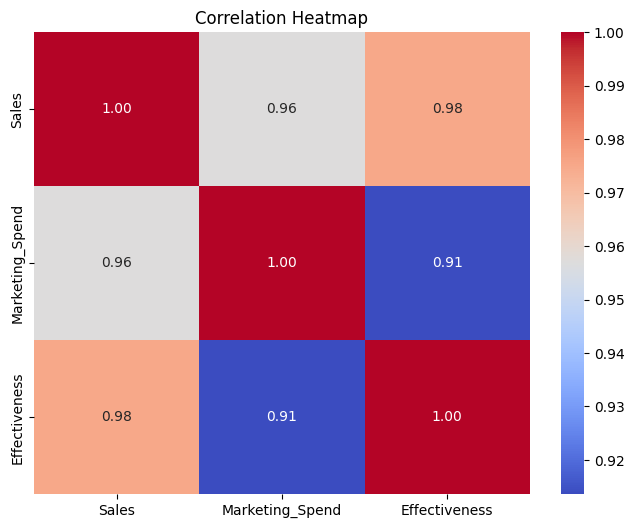

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Day_13_Pharma_data.csv')

# Check the first few rows to understand the structure
print(df.head())

# Check for missing values and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

# Handle missing values:
# For numeric columns, fill with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# For categorical columns, fill with the mode (most frequent value)
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no missing values after cleaning
print(df.isnull().sum())

# Create a bar plot for total sales per region
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Sales', estimator=sum, ci=None)
plt.title('Total Sales Per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Create a scatter plot of Marketing Spend vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Marketing_Spend', y='Sales')
plt.title('Marketing Spend vs. Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.show()

# Create a boxplot for drug effectiveness by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='Effectiveness')
plt.title('Drug Effectiveness by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Effectiveness')
plt.show()

# Create a line plot for the sales trend by product and trial period
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Trial_Period', y='Sales', hue='Product_Name')
plt.title('Sales Trend by Product and Trial Period')
plt.xlabel('Trial Period')
plt.ylabel('Sales')
plt.legend(title='Product')
plt.show()

# Calculate the correlation matrix for the relevant numeric columns
correlation_matrix = df[['Sales', 'Marketing_Spend', 'Effectiveness']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<Axes: xlabel='Trial_Period', ylabel='Sales'>

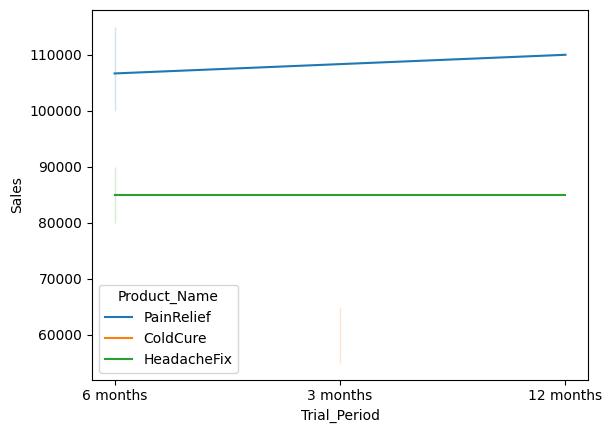

In [32]:
sns.lineplot(data=df, x='Trial_Period', y='Sales', hue='Product_Name')


In [31]:
# Check the column names in the dataset
print(df.columns)


Index(['Product_ID', 'Product_Name', 'Region', 'Marketing_Spend', 'Sales',
       'Effectiveness', 'Side_Effects', 'Age_Group', 'Trial_Period'],
      dtype='object')
